In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# Train data
train_x = np.loadtxt("../Data/trn_x.txt")
train_x_label = np.loadtxt("../Data/trn_x_class.txt")

train_y = np.loadtxt("../Data/trn_y.txt")
train_y_label = np.loadtxt("../Data/trn_y_class.txt")

# Test data
# I got a repeated error due to division by 0 located at index 117 of the tst_xy and tst_xy_126 files (8.1813755e+01  -8.5905726e+01). 
# Both likelihoods (x and y) are equal to 0 for said point resulting in an error. My assumption is that it is a rounding issue. 
# There is not enough time to dig deeper into it and as such I will be completely removing it from the dataset for the rest of this.

test_xy = np.loadtxt("../Data/tst_xy.txt")
test_xy_label = np.loadtxt("../Data/tst_xy_class.txt")
test_xy = np.delete(test_xy, 117, axis=0)
test_xy_label = np.delete(test_xy_label, 117, axis=0)

test_xy_126 = np.loadtxt("../Data/tst_xy_126.txt")
test_xy_126_label = np.loadtxt("../Data/tst_xy_126_class.txt")
test_xy_126 = np.delete(test_xy, 117, axis=0)
test_xy_126_label = np.delete(test_xy_label, 117, axis=0)

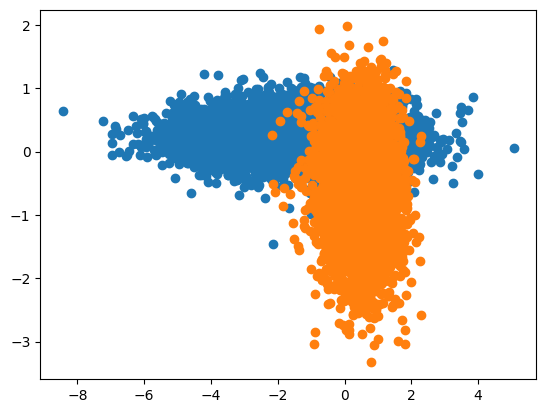

In [3]:
#Scatterplots to visualize distributions
plt.scatter(train_x[:, 0], train_x[:, 1])
plt.scatter(train_y[:, 0], train_y[:, 1])

plt.show()

In [4]:
# x statistics
train_x_mean = train_x.mean(axis=0)
train_x_cov = np.cov(train_x, rowvar=False)

# y statistics
train_y_mean = train_y.mean(axis=0)
train_y_cov = np.cov(train_y, rowvar=False)

# priors
x_length = len(train_x)
y_length = len(train_y)
prior_x = x_length / (x_length + y_length)
prior_y = y_length / (x_length + y_length)

In [5]:
#Likelihood of data coming from a 3-D gaussian with given mean and cov
def likelihood(data, mean, cov):
        a = -0.5 * np.matmul((data - mean), np.linalg.inv(cov))
        b = np.matmul(a,(data - mean))
        likelihood = (1 / (2 * np.pi)) * (1 / (np.linalg.det(cov) ** (1/2)) * np.exp(b))
        return(likelihood)

#The posterior probability of data belonging to class '1'
#In the case of binary classification we only need to calculate the posterior for one of the two classes.
def posterior(data, mean, cov, prior_x = 0.5, prior_y = 0.5):
    posterior = (likelihood(data, train_x_mean, train_x_cov) * prior_x) / ((likelihood(data, train_x_mean, train_x_cov) * prior_x) + (likelihood(data, train_y_mean, train_y_cov) * prior_y))
    return(posterior)

#The classifier function accepts the posterior and outputs '1' or '2'
#0 for error if we get probabilities out of the 0-1 range. Mostly to check the math was ok
def classifier(post):
        if post < 0 or post > 1:
                return(0)
        else:
                if post >= 0.5:
                       return(1)
                else:
                       return(2)

Classify instances in tst_xy, and use the corresponding label file tst_xy_class to calculate the accuracy

In [6]:
class_result = np.zeros(np.shape(test_xy)[0])
for counteri, i in enumerate(test_xy):
    post = posterior(i, train_x_mean, train_x_cov, prior_x=prior_x, prior_y=prior_y)
    class_result[counteri] = classifier(post)

#Checking value counts to make sure there aren't any errors
unique, counts = np.unique(class_result, return_counts=True)
print(np.asarray((unique, counts)).T)

# #Using sklearn accuracy cause lazy
print('Accuracy: ', accuracy_score(test_xy_label, class_result))

[[1.000e+00 1.173e+03]
 [2.000e+00 8.530e+02]]
Accuracy:  0.9096742349457059


Classify instances in tst_xy_126 by assuming a uniform prior over the space of hypotheses, and use the corresponding label file tst_xy_126_class to calculate the accuracy.

In [7]:
class_result = np.zeros(np.shape(test_xy_126)[0])
for counteri, i in enumerate(test_xy_126):
    post = posterior(i, train_x_mean, train_x_cov)
    class_result[counteri] = classifier(post)

print('Accuracy: ', accuracy_score(test_xy_126_label, class_result))

Accuracy:  0.9032098765432098


Classify instances in tst_xy_126 by assuming a prior probability of 0.9 for Class x and 0.1 for Class y, and use the corresponding label file tst_xy_126_class to calculate the accuracy; compare the results with those of (b)

In [8]:
class_result = np.zeros(np.shape(test_xy_126)[0])
for counteri, i in enumerate(test_xy_126):
    post = posterior(i, train_x_mean, train_x_cov, prior_x=0.9, prior_y=0.1)
    class_result[counteri] = classifier(post)

print(accuracy_score(test_xy_126_label, class_result))

0.8676543209876543


The priors are probably not representing reality
